### This file was run in Google Collab

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [0]:
bank_df = pd.read_csv("bank-1.csv")

In [3]:
bank_df.shape

(10000, 14)

In [4]:
#checking for nan values
bank_df[bank_df.isnull().any(axis=1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


### Drop the columns which are unique for all users like IDs

In [0]:
bank_df = bank_df.drop(['RowNumber','Surname','CustomerId'],axis=1)

In [6]:
bank_df.shape

(10000, 11)

In [7]:
bank_df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
le_class = LabelEncoder()
bank_df["Gender"] = le_class.fit_transform(bank_df["Gender"])
bank_df["Gender"].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [9]:
bank_df["Geography"] = le_class.fit_transform(bank_df["Geography"])
bank_df["Geography"].value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [10]:
bank_df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
bank_df.duplicated().any()

False

### removal of outliers removes all the 1's hence dropped out the idea of outlier removal

In [12]:
bank_df1 = bank_df.corr(method = "pearson")
bank_df1.iloc[:,10:11]

,Exited
CreditScore,-0.027094
Geography,0.035943
Gender,-0.106512
Age,0.285323
Tenure,-0.014001
Balance,0.118533
NumOfProducts,-0.047820
HasCrCard,-0.007138
IsActiveMember,-0.156128
EstimatedSalary,0.012097


### correlation of the features looks poor

### Distinguish the feature and target set

In [0]:
#exited is the target and rest are independent features
Y=bank_df[['Exited']]
X=bank_df.drop(['Exited'],axis=1)

### There is a imbalance in the data, there are 7963 0's and 2037 1's

In [14]:
Y['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=.2, 
                                                    random_state=42)
print("X_train =", X_train.shape, "y_train =", y_train.shape,"X_test =", X_test.shape,"y_test =", y_test.shape)

X_train = (8000, 10) y_train = (8000, 1) X_test = (2000, 10) y_test = (2000, 1)


### balancing the data using class_weight method

### tried to form the dictionary of weighted 1's and 0's but that is reducing the accuracy and increasing the loss

In [0]:
from sklearn.utils import class_weight

In [0]:

class_weights = class_weight.compute_sample_weight('balanced', y_train)

In [20]:
# Perform scaling of the data using Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled) # Creating dataframe
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled) # Creating dataframe

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [21]:
#building the model
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [0]:

train_Y = to_categorical(y_train)
test_Y = to_categorical(y_test)

In [0]:
#create model
model_2 = Sequential()

#get number of columns in training data
n_cols_2 = X_train_scaled.shape[1]

#add layers to model
model_2.add(Dense(250, activation='relu', input_shape=(n_cols_2,)))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dense(2, activation='softmax'))

In [0]:
early_stopping_monitor = EarlyStopping(patience=3)

In [0]:
#compile model using accuracy to measure model performance
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
#train model
history = model_2.fit(X_train_scaled, train_Y, epochs=30, validation_split=0.2, callbacks=[early_stopping_monitor],class_weight=class_weights)

Train on 6400 samples, validate on 1600 samples
Epoch 1/30
6400/6400 [==============================] - 1s 164us/step - loss: 0.4049 - acc: 0.8298 - val_loss: 0.3617 - val_acc: 0.8488
Epoch 2/30
6400/6400 [==============================] - 1s 125us/step - loss: 0.3549 - acc: 0.8552 - val_loss: 0.3779 - val_acc: 0.8344
Epoch 3/30
6400/6400 [==============================] - 1s 124us/step - loss: 0.3444 - acc: 0.8597 - val_loss: 0.3726 - val_acc: 0.8488
Epoch 4/30
6400/6400 [==============================] - 1s 124us/step - loss: 0.3376 - acc: 0.8619 - val_loss: 0.3529 - val_acc: 0.8488
Epoch 5/30
6400/6400 [==============================] - 1s 124us/step - loss: 0.3295 - acc: 0.8647 - val_loss: 0.3502 - val_acc: 0.8562
Epoch 6/30
6400/6400 [==============================] - 1s 120us/step - loss: 0.3222 - acc: 0.8720 - val_loss: 0.3581 - val_acc: 0.8488
Epoch 7/30
6400/6400 [==============================] - 1s 122us/step - loss: 0.3160 - acc: 0.8680 - val_loss: 0.3536 - val_acc: 0.8525


In [0]:
test_y_predictions = model_2.predict(X_test_scaled)

In [37]:
test_y_predictions

array([[0.9901273 , 0.00987267],
       [0.9856705 , 0.01432947],
       [0.88890904, 0.11109098],
       ...,
       [0.4220302 , 0.57796973],
       [0.8921759 , 0.10782414],
       [0.7578358 , 0.2421642 ]], dtype=float32)

In [38]:
scores = model_2.evaluate(X_train_scaled, train_Y, verbose=0)
print(scores[1]*100)

87.64999999999999


In [39]:
scores = model_2.evaluate(X_test_scaled, test_Y, verbose=0)
print(scores[1]*100)

86.15


In [40]:
print(history.history['acc'])
print(history.history['val_acc'])

[0.82984375, 0.85515625, 0.8596875, 0.861875, 0.8646875, 0.87203125, 0.86796875, 0.873125]
[0.84875, 0.834375, 0.84875, 0.84875, 0.85625, 0.84875, 0.8525, 0.85625]


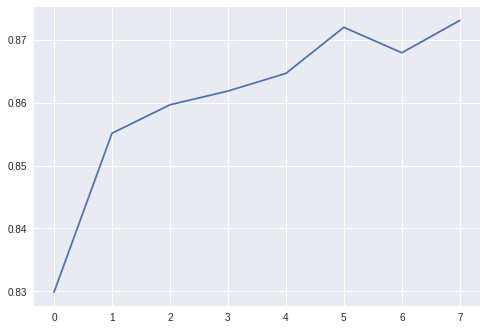

In [43]:
plt.plot(history.history['acc'])
plt.show()

In [44]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 250)               2750      
_________________________________________________________________
dense_6 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_7 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 502       
Total params: 128,752
Trainable params: 128,752
Non-trainable params: 0
_________________________________________________________________


### optimizing the model

from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix


### adagrad and addelta also can be used as optimizer but taking lot of time to run. hence restricting to SGD,Adam and RMSprop

In [0]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
optimizer = ['SGD', 'RMSprop', 'Adam']
params = dict(epochs = epochs,batch_size=batch_size,optimizer=optimizer)
seed = 7
np.random.seed(seed)

In [0]:
def create_model(optimizer='SGD'): 
    model = Sequential()
    n_cols_2 = X_train_scaled.shape[1]
    model.add(Dense(250, activation='relu', input_shape=(n_cols_2,)))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [0]:


model1 = KerasClassifier(build_fn=create_model,verbose=0)
grid = GridSearchCV(estimator=model1, param_grid=params, n_jobs=-1)

In [49]:
grid_result = grid.fit(X_train_scaled, train_Y,class_weight=class_weights, 
                      validation_data=(X_test_scaled, test_Y))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [50]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

Best: 0.856375 using {'batch_size': 80, 'epochs': 100, 'optimizer': 'SGD'}
0.855250 with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'SGD'}
0.205500 with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'RMSprop'}
0.852875 with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'Adam'}
0.843500 with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'SGD'}
0.205500 with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'RMSprop'}
0.812375 with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'Adam'}
0.786250 with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'SGD'}
0.205500 with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'RMSprop'}
0.811250 with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'Adam'}
0.848625 with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'SGD'}
0.205500 with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'RMSprop'}
0.847625 with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'Adam'}
0.855875 with: {'batch_size': 20, 'epochs': 50, 'optimizer': 'SGD'}
0.205500 with: {'b

### Best model is 0.856375 using {'batch_size': 80, 'epochs': 100, 'optimizer': 'SGD'}

In [0]:
from keras.optimizers import SGD

In [0]:

def create_model(learn_rate=0.01, momentum=0):
    model2 = Sequential()
    n_cols_2 = X_train_scaled.shape[1]
    model2.add(Dense(250, activation='sigmoid', input_shape=(n_cols_2,)))
    model2.add(Dense(units=250,activation="relu"))
    model2.add(Dense(units=250,activation="relu"))
    model2.add(Dense(units=2,activation="softmax"))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model2

In [0]:
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)

In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
model2 = KerasClassifier(build_fn=create_model,epochs = 100, batch_size = 20,verbose=0)
grid = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=-1)

In [57]:
grid_result = grid.fit(X_train_scaled, train_Y,class_weight=class_weights,
                      validation_data=(X_test_scaled, test_Y))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


### After fine tuning the SGD model the best result is : 0.859500 using {'batch_size': 20, 'epochs': 100, 'optimizer': 'SGD','learn_rate': 0.001, 'momentum': 0.8}


In [0]:
# Finalize the Model
batch_size = 20
epochs = 100
optimizer = SGD
learning_rate = 0.001
momentum = 0.8

model3 = Sequential()
n_cols_2 = X_train_scaled.shape[1]
model3.add(Dense(250, activation='sigmoid', input_shape=(n_cols_2,)))
model3.add(Dense(units=250,activation="relu"))
model3.add(Dense(units=250,activation="relu"))
model3.add(Dense(units=2,activation="softmax"))
optimizer = SGD(lr=learn_rate, momentum=momentum)
model3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
sgd = SGD(lr=learning_rate, momentum=momentum, nesterov=False)
model3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
history = model3.fit(X_train_scaled, train_Y, 
          validation_data=(X_test_scaled, test_Y), 
          epochs=epochs,
          batch_size = batch_size,
          verbose = 2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
 - 1s - loss: 0.4916 - acc: 0.7933 - val_loss: 0.4556 - val_acc: 0.8035
Epoch 2/100
 - 1s - loss: 0.4621 - acc: 0.7968 - val_loss: 0.4321 - val_acc: 0.8065
Epoch 3/100
 - 1s - loss: 0.4462 - acc: 0.8016 - val_loss: 0.4256 - val_acc: 0.8130
Epoch 4/100
 - 1s - loss: 0.4424 - acc: 0.8055 - val_loss: 0.4231 - val_acc: 0.8170
Epoch 5/100
 - 1s - loss: 0.4372 - acc: 0.8069 - val_loss: 0.4254 - val_acc: 0.8105
Epoch 6/100
 - 1s - loss: 0.4369 - acc: 0.8075 - val_loss: 0.4200 - val_acc: 0.8130
Epoch 7/100
 - 1s - loss: 0.4349 - acc: 0.8109 - val_loss: 0.4116 - val_acc: 0.8125
Epoch 8/100
 - 1s - loss: 0.4291 - acc: 0.8130 - val_loss: 0.4082 - val_acc: 0.8265
Epoch 9/100
 - 1s - loss: 0.4245 - acc: 0.8140 - val_loss: 0.4213 - val_acc: 0.8155
Epoch 10/100
 - 1s - loss: 0.4182 - acc: 0.8175 - val_loss: 0.4008 - val_acc: 0.8215
Epoch 11/100
 - 1s - loss: 0.4133 - acc: 0.8199 - val_loss: 0.3902 - val_acc: 0.8330
Epoch 12/100
 - 1s - loss:

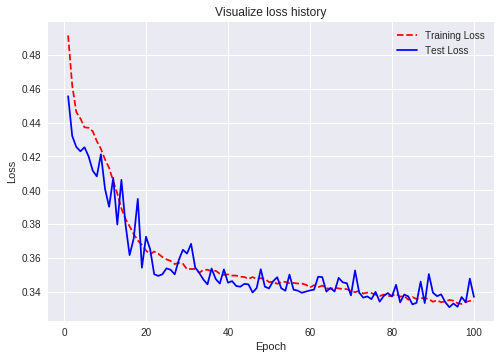

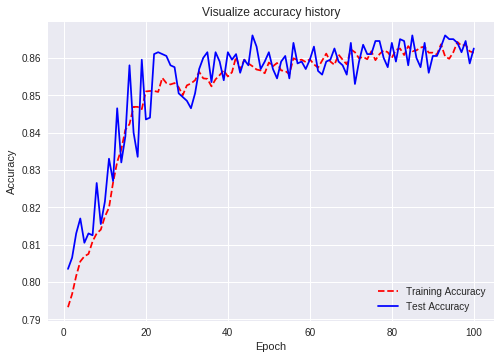

In [61]:
# Get training and test loss histories and also accuracies
training_loss = history.history['loss']
test_loss = history.history['val_loss']

training_acc = history.history['acc']
test_acc = history.history['val_acc']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.title('Visualize loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

# Visualize accuracy history
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title('Visualize accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();


In [62]:
y_pred=model3.predict(X_test_scaled)
y_pred[0:5]


array([[0.93539447, 0.06460558],
       [0.96459365, 0.03540639],
       [0.9037528 , 0.09624721],
       [0.8783329 , 0.12166711],
       [0.93866175, 0.06133821]], dtype=float32)

In [63]:
y_pred_prob = y_pred[:, 1]
print(y_pred_prob)

[0.06460558 0.03540639 0.09624721 ... 0.6818479  0.13658789 0.27119774]


In [65]:
accuracy = model3.evaluate(x=X_train_scaled,y=train_Y,verbose=0)
print("Training Model Accuracy: ", accuracy[1])
accuracy = model3.evaluate(x=X_test_scaled,y=test_Y,verbose=0)
print("Test Model Accuracy: ", accuracy[1])

Training Model Accuracy:  0.863875
Test Model Accuracy:  0.8625


In [66]:
matrix = metrics.confusion_matrix(test_Y.argmax(axis=1), y_pred.argmax(axis=1))
print("Confusion Matrix")
print(matrix)

Confusion Matrix
[[1546   61]
 [ 214  179]]


### The model predicts 0's better than 1's